# NTDS Project:  XXx Project Title XXX

[Github Link] 

[github link]: https://github.com/mdeff/ntds_2018


## Students

* Team: 50

* Students: Görkem Çamli, Raphael Laporte, Ilija Gjorgjiev, Murat Genc

* Dataset: Spammers on Social Network





In [1]:
! pip3 install seaborn==0.9.0

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import DataProcessing as processing

In [0]:
%matplotlib inline

In [5]:
sns.__version__


'0.9.0'

## Introduction

Social Networks are an essential part of the many people's daily life. With the growth and  spread of the social networks, the amount of spammers with bad intentions increase as well. In this project, we aim to find what makes a spammer and whether we can find spammers based on the features such as age, gender and time of interaction. After understanding the nature of our network data our final aim is to try to predict spammers on social networks.

For this project we will use the Spammers on Social Network data which includes users and relations information in a given social network. 

XXXXX explain more XXX

## Data Processing

We have processed the data differently for several different steps in our project. For the basic statistical analysis and understanding the properties of our network, we will use the below processing steps and the final created adjacency matrix.

For the prediction level of our project, we decided to preprocess the data further in a way that we can feed them into neural networks. XXX further explanation from Raphael or Ilija XXXX.

In [0]:
relations, users = processing.readData()

Our data is composed from relations and users. We will explore them below separately.

### Relations 

As we can see relations consist of 5 features: day, time_ms, src, dst and relation. Each row shows a relation between a source and destination (users in this case) and which day, how long and what type of relation it is. For our current study we will focus on relation 5.

We have a total of 83176 relations in our data. Minimum interaction time is 0.129 seconds (1.290000e+02 ms) and maximum is 24 hours (8.639946e+07 ms)	 while in average interaction in these relation events are around 12.12 hours (4.364584e+07 ms). 




In [7]:
processing.displayInfo(relations, "relations")

,day,time_ms,src,dst,relation
0,0,7857852,1,3993630,5
1,0,7860977,1,3181660,5
2,0,7862420,1,1582548,5
3,0,7866986,1,5208994,5
4,2,21455967,1,2330216,5


('We have ', '83176', ' ', 'relations', 's.')
('Stats info about ', 'relations', ':')


,day,time_ms,src,dst,relation
count,83176.000000,8.317600e+04,8.317600e+04,8.317600e+04,83176.0
mean,5.363735,4.364584e+07,2.560122e+06,2.771619e+06,5.0
std,2.478274,2.485177e+07,1.680537e+06,1.653804e+06,0.0
min,0.000000,1.290000e+02,1.000000e+00,1.000000e+00,5.0
25%,4.000000,2.550006e+07,7.689900e+05,1.199187e+06,5.0
50%,6.000000,4.165693e+07,2.440318e+06,2.826794e+06,5.0
75%,7.000000,6.315638e+07,4.231085e+06,4.242568e+06,5.0
max,9.000000,8.639946e+07,5.607214e+06,5.607437e+06,5.0


Our data is already clean, therefore before moving forward we check if there is any null value, which we don't. 

We also make a sanity check to see we only have relation type of 5 in our relation data. 

The day values are from 0 to 9.

In [8]:
processing.printFurtherInfo(relations)

Is there any NA? 
____________


day         0
time_ms     0
src         0
dst         0
relation    0
dtype: int64


Make sure we only have relation type 5 as data 
____________


array([5])


What are the unique day values in relations data? 
____________


array([0, 2, 3, 4, 5, 6, 7, 9, 1, 8])

### Users

In the users data we have some characteristic information of the users such as gender, time, age range and whether they are manually identified as spammer or not.

We have 62173 users in our data where their age ranges between 10-70.


In [9]:
processing.displayInfo(users, "users")

,User Id,Gender,Time,Age Range,Spammer Label
0,1,M,0.9000,30,0
1,190,M,0.2000,50,0
2,270,M,0.2625,30,0
3,319,M,0.0000,30,0
4,407,M,0.0500,50,0


('We have ', '62173', ' ', 'users', 's.')
('Stats info about ', 'users', ':')


,User Id,Time,Age Range,Spammer Label
count,6.217300e+04,62173.000000,62173.000000,62173.000000
mean,2.800429e+06,0.417814,31.740466,0.039374
std,1.622317e+06,0.318942,11.467868,0.194485
min,1.000000e+00,0.000000,10.000000,0.000000
25%,1.392652e+06,0.112500,20.000000,0.000000
50%,2.799469e+06,0.362500,30.000000,0.000000
75%,4.207705e+06,0.700000,40.000000,0.000000
max,5.607437e+06,1.000000,70.000000,1.000000


### Create Adjacency Matrix of the Network

After discovering how our data looks like, we create our adjacency matrix with the given informations. Our nodes will be specified as users and edges will be the relations. We will create both directed and undirected graph in here.

In [0]:
# create nodes from users and edges from relations
nodes = processing.createNodes(users)
edges = processing.createEdges(nodes, relations)

In [0]:
# created undirected adjacency matrix
adjacency = processing.createAdjacencyMatrix(nodes, edges, isDirected = False)

# created directed adjacency matrix
adjacency_directed = processing.createAdjacencyMatrix(nodes, edges, isDirected = True)

#### Undirected Adjacency Matrix

In [0]:
# plt.spy(adjacency, markersize=1)
# plt.title('undirected adjacency matrix')

#### Directed Adjacency Matrix

In [0]:
# plt.spy(adjacency_directed, markersize=1)
# plt.title('directed adjacency matrix')

## Data and Network Exploration

In this part we will focus on understanding the data and network better by asking some specific questions and providing some statistics to better understand them.


 #### What is the number of nodes and edges?
 
 Our network has 62173 node and 83176 edges.

In [14]:
num_nodes = len(nodes)
num_edges = len(edges)

print("We have ", num_nodes, " nodes and ", num_edges, " edges.")

('We have ', 62173, ' nodes and ', 83176, ' edges.')


#### What is the degree distribution of the network and maximum network degree?

Our network max degree is 8216 and as we can see from our degree distribution plot, there are very few nodes that has many nodes, our network is a sparse network since most of our nodes has very low incoming and outgoing edges.

In [0]:
in_degree, out_degree, degree = processing.calculateIn_Out_Degrees(edges, num_nodes)

In [36]:
max(degree)

array([8216])

#### Degree Distribution Plot

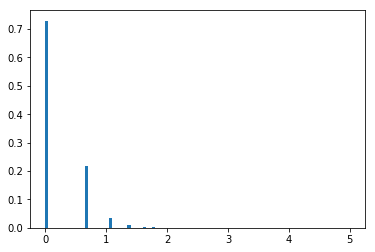

In [16]:
weights = np.ones_like(degree) / float(num_nodes)
plt.hist(np.log(degree), weights=weights, bins=100, range= (0,5));

 #### What is the average degree of the network both directed and undirected one?
 
 The network L is 83176 and average degree is 1.33 therefore we can say that our network is pretty scarce. 

In [17]:
avg_degree = processing.calculateAvgDegree(in_degree, out_degree, num_nodes)

('L is: ', 83176)
('average degree is: ', 1)


#### Is the network connected? If not, how many connected components it has?

As we can see our network is connected hence has by one big component.

In [18]:
isConnected = processing.isConnected(adjacency)
print(isConnected)

True


#### How many of the users are manually labeled as spammers?

We can see below that in our network 2448 of the users are labeled as spammers which are around 3.9374% of the total users. This means that out of 100 people around 4 of them are considered as spammers while manually labeled which is a very serious number.

In [19]:
spammer_distribution = pd.DataFrame(nodes.groupby(["Spammer Label"])["User Id"].count())
spammer_distribution.reset_index(inplace=True)
spammer_distribution.rename(columns={"User Id":"count"}, inplace=True)
spammer_distribution

,Spammer Label,count
0,0,59725
1,1,2448


In [20]:
# Spammer % in total users
spammer_distribution[spammer_distribution["Spammer Label"]==1]["count"] * 100.0 / num_nodes

1    3.9374
Name: count, dtype: float64

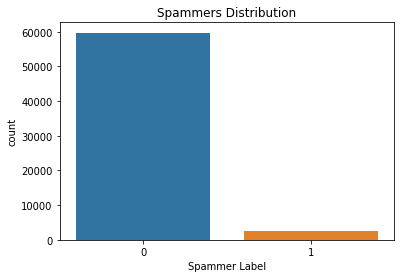

In [21]:
ax = sns.barplot(x="Spammer Label", y="count", data=spammer_distribution).set_title('Spammers Distribution')

0s are non-spammers and 1s are Spammers.

 ### Check the Attribute Distributions?
 
 In this part, we discover more about the Age variable of our data.
 
 #### What are the AGE distributions (for spammers, non-spammers and in general)?
 
 The age range for the users are from 10-70. As we can see the 70% of the overal users are fall in age range 57.5 and below.

In [22]:
nodes_age = pd.DataFrame(nodes.groupby(["Spammer Label", "Age Range"])["User Id"].count())
nodes_age.reset_index(inplace=True)
nodes_age.rename(columns={"User Id":"count"}, inplace=True)
nodes_age.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Spammer Label,0,0,0,0,0,0,0,1,1,1,1,1,1,1
Age Range,10,20,30,40,50,60,70,10,20,30,40,50,60,70
count,1653,16527,21853,11707,5772,1870,343,82,686,847,495,255,66,17


In [37]:
nodes_age.describe()

,Spammer Label,Age Range,count
count,14.000000,14.000000,14.000000
mean,0.500000,40.000000,4440.928571
std,0.518875,20.754981,7086.366656
min,0.000000,10.000000,17.000000
25%,0.000000,22.500000,277.000000
50%,0.500000,40.000000,766.500000
75%,1.000000,57.500000,4796.500000
max,1.000000,70.000000,21853.000000


#### Spammers Distribution Plot by Age

In this plot we can see that most frequent age range is from 20 to 50 in the social network data we are investigating. The non-spammers age distribution is more diversive compare to the spammers. However, we need also keep in mind that spammers are around 4% of the users, even though age distributions seems almost equally distributed in this plot, if we look them independently from non-spammers we can find a more insightful understanding about age distribution between spammers.

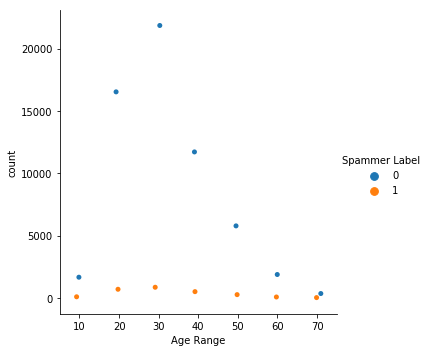

In [23]:
g = sns.catplot(x="Age Range", y="count", hue="Spammer Label", data=nodes_age)

#### Age Distribution only for Spammers

In order to see better the Spammer distributions, we draw it separetly as well. We can see that the majority of the spammers are in age range 20-40, which can tell that they are either young or adults. The numbers of spammers who are either old or teenagers are very low.

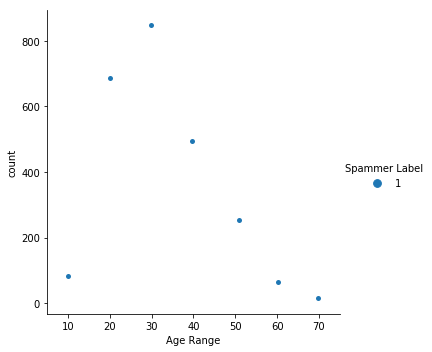

In [38]:
nodes_age_spammers = nodes_age[nodes_age["Spammer Label"]==1]
g = sns.catplot(x="Age Range", y="count", hue="Spammer Label", data=nodes_age_spammers)

 #### What are the GENDER distributions (for spammers, non-spammers and in general)?
 
 Another interesting idea is to look for gender of the spammers. In our data most of the users are male and both in spammers and nonspammers male gender is the dominant one. Age range would be an useful feature when we try to predict spammers.

In [24]:
nodes_gender = pd.DataFrame(nodes.groupby(["Spammer Label", "Gender"])["User Id"].count())
nodes_gender.reset_index(inplace=True)
nodes_gender.rename(columns={"User Id":"count"}, inplace=True)
nodes_gender

,Spammer Label,Gender,count
0,0,F,77
1,0,M,59648
2,1,F,39
3,1,M,2409


#### Spammers Distribution Plot by Gender

In this plot as well we can observe the male dominance in the social network. Also, this gap is even higher in the non-spammers. Within the spammers as well female gender is fewer.

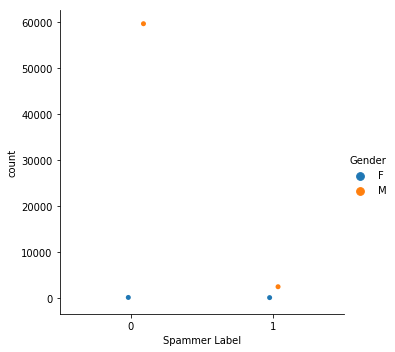

In [25]:
g = sns.catplot(x="Spammer Label", y="count", hue="Gender", data=nodes_gender)

#### What % of the Spammers female?

As we can see only 1.593% of the Spammers are female which would be an interesting idea to keep in mind for further network analysis and predictions. This feature could be distinctive while trying to predict Spammers.

In [26]:
spammer_females= nodes_gender[(nodes_gender["Spammer Label"]==1) & (nodes_gender["Gender"] == "F")]["count"]
all_spammers = nodes_gender[(nodes_gender["Spammer Label"]==1)]["count"].sum()
female_spammer_percentage = (spammer_females *100.0)/ all_spammers
female_spammer_percentage

2    1.593137
Name: count, dtype: float64

 #### What are the TIME SPENT by spammers and non-spammers? 
 
 Average time spent by Spammers are actually lower (0.264) than time spent by actual users (0.424) which are non-spammers. 

In [27]:
nodes_time = nodes.groupby(["Spammer Label"])["Time"].mean()
nodes_time

Spammer Label
0    0.424106
1    0.264308
Name: Time, dtype: float64

As we can see from the below scatter plot, the time spent by the user is not very distinguishable for the Spammers in this case since they are spread out in the plot. We don't see any time interval where there is particularly more spammers compared with the other users.

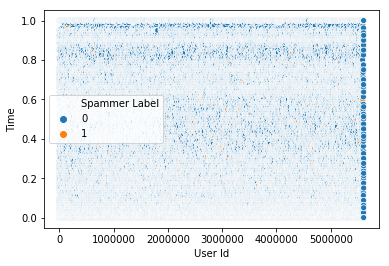

In [28]:
sns.scatterplot(x="User Id", y="Time" , hue="Spammer Label", data=nodes)

#### Check Time Spent only For Spammers

When we check for only Spammers we can see the majority of the Spammers fall below 0.2 Time interval.

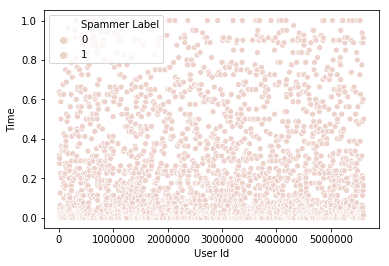

In [29]:
nodes_time_spammers =  nodes[["Spammer Label", "User Id", "Time" ]]
nodes_time_spammers = nodes_time_spammers[nodes_time_spammers["Spammer Label"]== 1]
sns.scatterplot(x="User Id", y="Time" , hue="Spammer Label", data=nodes_time_spammers)

### How many relations belongs to Spammers? What % of the relations they are?

62055 of the edges start from a Spammer labeled source. This makes around 74.6% of the all relations.

This is very interesting. In the above, analysis we actually saw that only around 4% of the users were Spammers and these 4% of the users actually are responsible for the 74.6% of the events (relation 5). Even seeing this, could lead us to think that, the dominant nodes which has more outgoing edges are potential spammers whereas more scarce nodes are non-spammers. 

In [0]:
spammer_ids = nodes[nodes["Spammer Label"]==1]["User Id"]
spammer_ids_list = spammer_ids.tolist()

In [31]:
# Find relations where Spammers are the Source
spammers_relations = relations[relations['src'].isin(spammer_ids_list)]

,day,time_ms,src,dst,relation
74,0,31587223,10187,4966471,5
89,5,23502371,14161,768990,5
108,5,9797277,18754,4921394,5
111,3,46789691,19388,4831239,5
112,4,55077691,19388,3056913,5


In [32]:
print(len(spammers_relations))
print((len(spammers_relations)*100.0) /len(relations))

62055
74.6068577474


 #### What are the number of different days Spammers interact? (same for non-spammers)
 
We also checked how many different days these spammers were doing the relation 5 in the social network. Is this activity diversed through the days or done in same day? From the below Spammers Day Count Distribution we can see that most of these relations are created in the first or second day. Therefore, this might lead us to say that Spammers do these activities within a limited time period, so spam people on the same day rather than diversed in 10 days. This actually makes sense actually, if we think that spammers generally prone to spread the same info, so technology allows them to do multiple events easier such as send a chat info to all at the same etc.

In [0]:
spammers_count_day = pd.DataFrame(spammers_relations.groupby("src")["day"].count())
#spammers_count_day

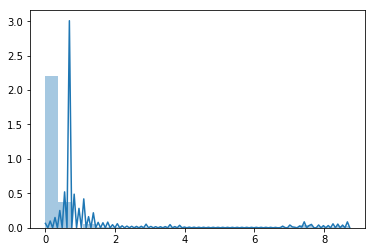

In [35]:
sns.distplot(np.log(spammers_count_day))